### NAME, first name:

## TP TELECOM204 – Coded Slotted Aloha (M. Coupechoux)

### Subject

In this TP, we compute the asymptotic performance of coded slotted Aloha MAC protocols and we simulate one of its variants. For every question, there is a Python program to complete. You may add some text/code to explain your approach, comment the results or showing intermediate results. Please send me your code and responses in Jupyter-notebook format (yourname.ipynb) at marceau.coupechoux@telecom-paris.fr. 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/coupecho/coded-slotted-aloha/blob/main/irsa-student-version.ipynb)

### Exercise 1 : Contention Resolution Diversity Slotted Aloha (CRDSA)

In this first part of the TP, we simulate a network adopting CRDSA and implement the decoding algorithm. 

We consider the following variables:
* `Gp` the average number of transmitted packets per slot (the load)
* `M` the number of slots per frame
* `Tcrdsa` the throughput in number of successfully transmitted packet per slot
* `PLcrdsa` the packet loss rate
* `Nitsim` the number of iterations (frame) for the simulations
* `nbsuc` the number of decoded packets
* `nbpackets` the total number of packets
* `nbpacketsperframe` the number of packets per frame

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import random

G = np.arange(0.05,2,0.05,dtype=float)
M = 100
Nit = 20
Nitsim = 500
PLcrdsa = np.ndarray(len(G))
Tcrdsa = np.ndarray(len(G))
nbsuc = np.ndarray(len(G))
nbpackets = np.ndarray(len(G))
nbpacketsperframe = np.ndarray(len(G),dtype=np.int16)

1. **Implement the transmission and the decoding algorithm of CRDSA in the following loop**

In [149]:
for g in range(len(G)): # loop on the different loads
    nbpackets[g] = 0
    nbsuc[g] = 0
    nbpacketsperframe[g] = np.floor(G[g]*M)
    for i in range(Nitsim): # loop on the number of frames
        nbpackets[g] = nbpackets[g]+nbpacketsperframe[g]
        # transmit duplicates here
        # decoding algorithm here
Tcrdsa = # throughput of CRDSA
PLcrdsa = # packet loss rate od CRDSA

2. **Plot the throughput of CRDSA as a function of the load and compare to the throughput of slotted Aloha**

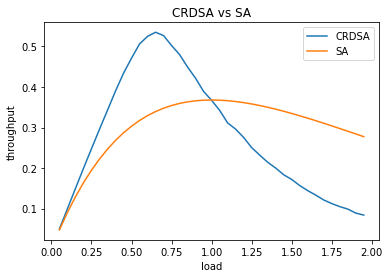

In [150]:
TSA = # throughput of slotted ALOHA
fig, ax = plt.subplots()
ax.plot(G, Tcrdsa, label='CRDSA')  
ax.plot(G, TSA, label='SA')  
ax.set_xlabel('load')  # Add an x-label to the axes.
ax.set_ylabel('throughput')  # Add a y-label to the axes.
ax.set_title("CRDSA vs SA")  # Add a title to the axes.
ax.legend();  # Add a legend.

3. **Plot the packet loss rate of CRDSA**

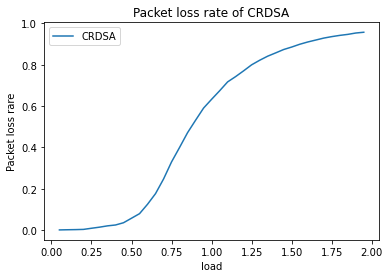

In [151]:
fig, ax = plt.subplots()
ax.plot(G, PLcrdsa, label='CRDSA')  
ax.set_xlabel('load')  # Add an x-label to the axes.
ax.set_ylabel('Packet loss rare')  # Add a y-label to the axes.
ax.set_title("Packet loss rate of CRDSA")  # Add a title to the axes.
ax.legend();  # Add a legend.

### Exercise 2 : Irregular Repetition Slotted Aloha (IRSA)

In this second part of the TP, we want to compute the packet loss rate and the throughput of IRSA for a given burst degree distribution.

We consider the following variables:
* `Lambda` is the burst node degree distribution
* `lambdal` is the egde-perspective burst node degree distribution
* `rhol` is the edge-perspective slot node degree distribution
* `p` is the probability that an edge at a burst node is unknown
* `q` is the probability that an edge at a slot node is unknown
* `Nbiter` is the number of iterations for the fixed point equation
* `G` is the load
* `PL` is the packet loss rate
* `T` is the throughput

In [152]:
import numpy as np
import matplotlib.pyplot as plt
Lambda = np.array([0,0,0.5,0.28,0,0,0,0,0.22])
Lambda = np.array([0,0,0,1])
Nbiter = 100
p0 = 1
q0 = 1
G = np.arange(0,2,0.01,dtype=float)
PL = np.ndarray(len(G))
T = np.ndarray(len(G))

1. **Compute the average repetition rate.**

In [153]:
def computeLambdaprime1(Lambda):
    # compute Lambda'(1) here

2. **Derive `lambdal` from `Lambda`.**

In [154]:
def computelambdal(Lambda):
    # compute lambda_l here

3. **Define the fixed point function that will be used to compute iteratively `p`and `q`.**

In [155]:
def fixedpointfunction(p,q,G,Lambdaprime1,lambdal):
    # implement the fixed point function and return p and q

4. **Compute the packet loss rate.**

In [156]:
def packetloss(p,G,Lambdaprime1,Lambda):
    # compute the packet loss rate here

5. **This is the main program. Compute iteratively `p`and `q`using the fixed point equation.**

In [157]:
# initialize lambda_l and Lambda'(1) here
for i in range(len(G)):
    # loop on load
    for j in range(Nbiter):
        # iterate the fixed point here
    PL[i] = # retrieve the packet loss rate
    T[i] = # compute the throughput

6. **Show the packet loss rate as a function of the load.**

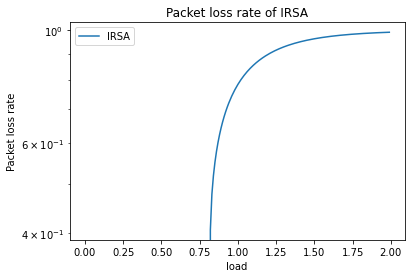

In [158]:
fig, ax = plt.subplots()
ax.semilogy(G, PL, label='IRSA')  
ax.set_xlabel('load')  # Add an x-label to the axes.
ax.set_ylabel('Packet loss rate')  # Add a y-label to the axes.
ax.set_title("Packet loss rate of IRSA")  # Add a title to the axes.
ax.legend();  # Add a legend.

7. **Show the throughput as a function of the load.**

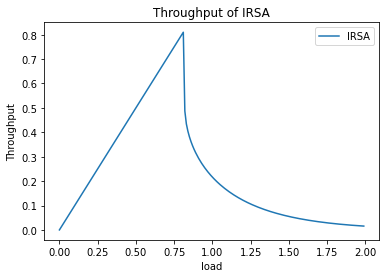

In [159]:
fig, ax = plt.subplots()
ax.plot(G, T, label='IRSA')  
ax.set_xlabel('load')  # Add an x-label to the axes.
ax.set_ylabel('Throughput')  # Add a y-label to the axes.
ax.set_title("Throughput of IRSA")  # Add a title to the axes.
ax.legend();  # Add a legend.

8. **Compare in a figure the performance of IRSA and traditional slotted Aloha in terms of throughput.**

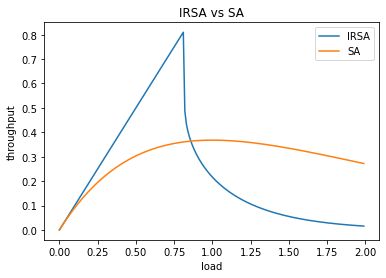

In [160]:
TSA = # compute here the throughput of slotted Aloha
fig, ax = plt.subplots()
ax.plot(G, T, label='IRSA')  
ax.plot(G, TSA, label='SA')  
ax.set_xlabel('load')  # Add an x-label to the axes.
ax.set_ylabel('throughput')  # Add a y-label to the axes.
ax.set_title("IRSA vs SA")  # Add a title to the axes.
ax.legend();  # Add a legend.

9. **Comment the results**